In [1]:
! git clone https://github.com/tlapinsk/colab-examples.git

Cloning into 'colab-examples'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 64995 (delta 1), reused 7 (delta 1), pack-reused 64986
Receiving objects: 100% (64995/64995), 1.39 GiB | 50.31 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (65777/65777), done.


In [2]:
! ls

colab-examples	sample_data


In [16]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
import random
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

import os
print(os.listdir("colab-examples/data"))

['dogs-vs-cats', 'animals-10', '.DS_Store']


In [4]:
# path to images
img_dir = "colab-examples/data/animals-10"

# list all available images type
print(os.listdir(img_dir))

['train']


In [10]:
# Split into dog versus cat categories (0, 1)
filenames = os.listdir("colab-examples/data/animals-10/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'butterfly':
        categories.append(0)
    elif category == 'cat':
        categories.append(1)
    elif category == 'cow':
        categories.append(2)
    elif category == 'dog':
        categories.append(3)
    elif category == 'elephant':
        categories.append(4)
    elif category == 'hen':
        categories.append(5)
    elif category == 'horse':
        categories.append(6)
    elif category == 'sheep':
        categories.append(7)
    elif category == 'spider':
        categories.append(8)
    elif category == 'squirrel':
        categories.append(9)
    else:
        categories.append(10)

        
print(len(filenames))
print(len(categories))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Preview changes
df.head()

28266
28266


,filename,category
0,cow.OIP-MK5Ueu6d1BR0_CxBV6AulAHaFj.jpeg,2
1,dog.OIP-Di5ZmDj5ImwVpJ0Cea1PMwHaFj.jpeg,3
2,sheep.OIP-JZfjKKG9PjKU4eUGupDrBAHaKj.jpeg,7
3,elephant.ea37b10821f5093ed1584d05fb1d4e9fe777e...,4
4,butterfly.OIP-1k5CHCKSejY2wDB3Tx0dXQHaFq.jpeg,0


In [11]:
# Preview changes
df.tail()

,filename,category
28261,hen.OIP-21mCOWjpLO0YAX-964WlEAHaEo.jpeg,5
28262,squirrel.OIP-dnSMK8Sf4kh6u7Ept4v4mQHaE7.jpeg,9
28263,hen.OIP-fvmszP9ovj_Rh4mCW-mAOAHaEK.jpeg,5
28264,hen.OIP-OBcUXjpaWiy17mSNpLBopAHaHc.jpeg,5
28265,horse.OIP-sZZLWpFtgLBoxgd5k15l1wHaE5.jpeg,6


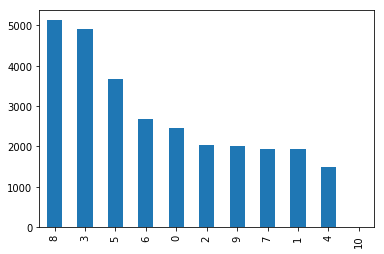

In [12]:
# Check out totals in a bar graph
df['category'].value_counts().plot.bar()

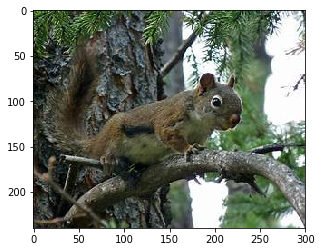

In [17]:
# Random sample image
sample = random.choice(filenames)
image = load_img("colab-examples/data/animals-10/train/"+sample)
plt.imshow(image)

In [0]:
import numpy as np
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image

In [44]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# View summary of model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_33 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 48, 48, 32)       

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

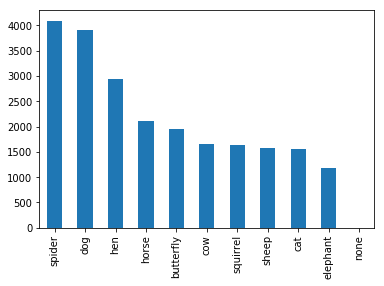

In [51]:
df["category"] = df["category"].replace({0: 'butterfly', 1: 'cat', 2: 'cow', 3: 'dog', 4: 'elephant', 5: 'hen', 6: 'horse', 7: 'sheep', 8: 'spider', 9: 'squirrel', 10: 'none'}) 

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

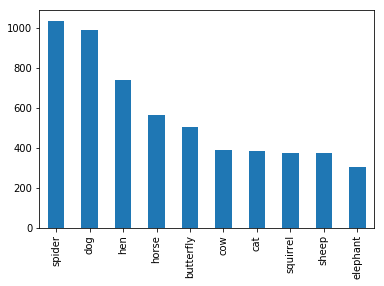

In [52]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train    = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size     = 32
epochs         = 50

In [48]:
# Set some variables
IMAGE_WIDTH    = 200
IMAGE_HEIGHT   = 200
IMAGE_SIZE     = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

# Build training generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "colab-examples/data/animals-10/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 22611 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [53]:
# Build validation generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "colab-examples/data/animals-10/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5654 validated image filenames belonging to 10 classes.


In [54]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "colab-examples/data/animals-10/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


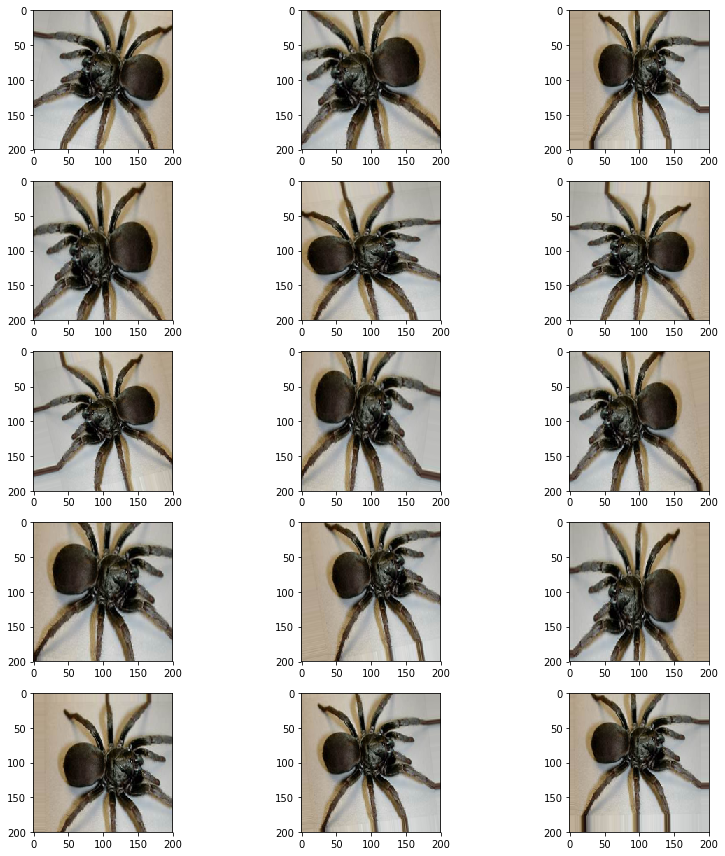

In [55]:
# Sample generator image
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)